# Python básico para ecuaciones diferenciales

## Bibliotecas fundamentales en análisis de datos

numpy (numerical python)
matplotlib (gráficos)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### Gráficos de funciones

In [2]:
#Gráfica de la función f en el intervalo (-a, a)
s = lambda x: np.sin(x)/x
# N es el tamaño de la discretización del intervalo
a= 2*np.pi
N = 10000
xx = np.linspace(-a,a,N)
ss = s(xx)

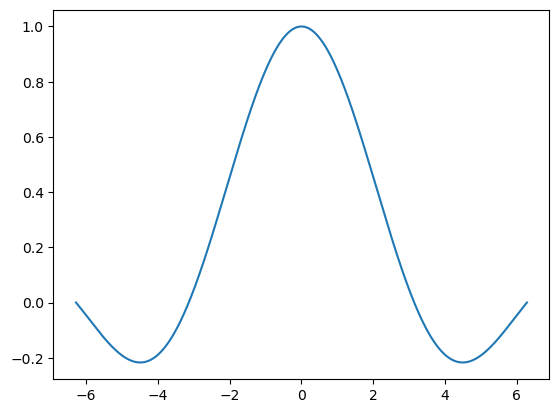

In [6]:
plt.plot(xx, ss)
plt.show()

In [3]:
g = lambda x: np.log(x) 
a= 2*np.exp(1)
N = 50
xx = np.linspace(0,a,N)
gg = g(xx)

C:\Users\jaime\AppData\Local\Temp\ipykernel_18596\1701266776.py:1: RuntimeWarning: divide by zero encountered in log
  g = lambda x: np.log(x)


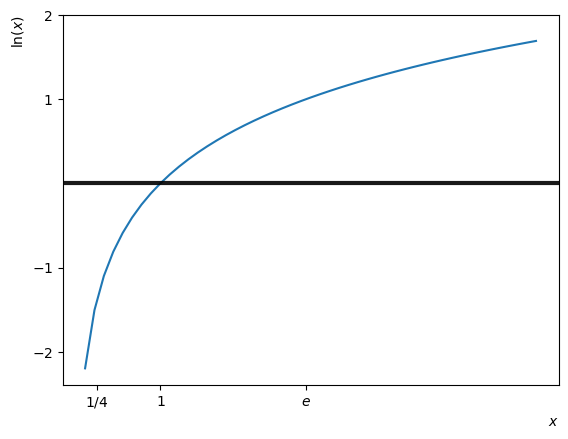

In [4]:
plt.plot(xx, gg)
plt.axhline(0.0,   linestyle='solid', alpha=0.9, lw = 3, color = 'k')
plt.yticks( [-2,  -1, 1, 2], [r'$-2$',   r'$-1$',     r'$1$', r'$2$'])
plt.xticks( [1/4,1,  np.exp(1)], [r'$1/4$', r'$1$',   r'$e$'])
plt.ylabel(r'$\ln(x)$', loc='top')
plt.xlabel(r'$x$', loc='right')
plt.show()

# Funciones de dos variables

In [6]:
from matplotlib import cm

In [7]:
def ftest(x, y):
    return    1/2*np.log((x-1)**2+ y**2)-1/2*np.log((x+1)**2+ y**2)

In [8]:
a = 3
npts = 100
X = np.linspace(-a, a, npts)
Y = np.linspace(-a/2, a/2, npts)
 
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2+Y**2)
Z = ftest(X,Y)

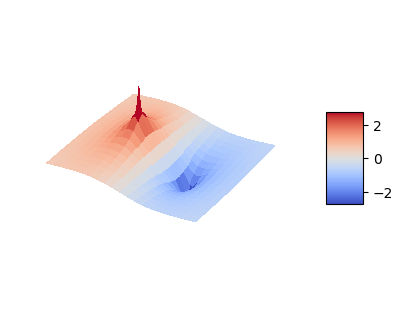

In [9]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap=cm.coolwarm,linewidth=3, antialiased=False)
#ax.set_zlim(-1.5, 1.5)
#ax.view_init(60, 90)
fig.colorbar(surf, shrink=0.25, aspect=2.5)
ax.axis('off')
plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

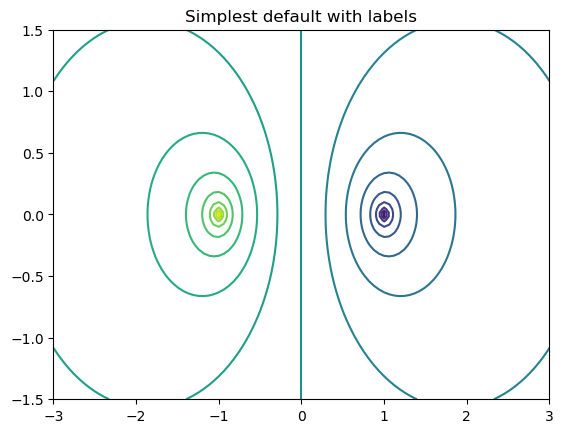

In [18]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 16)
#ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')


## Ecuaciones diferenciales  
$$
\frac{dy}{dx} = f(x,y)
$$

In [10]:
f = lambda x,y: -1/y +x

Se invoca la rutina numérica *solve_ivp* de la  biblioteca especializada *scipy.integrate*   
En este caso la biblioteca se llama *scipy.integrate* y la rutina *solve_ivp*. 

In [20]:
from scipy.integrate import solve_ivp

Se dan la condición inicial  y el intervalo en donde se presume que la solución existe

In [21]:
tmin, tmax = 0.10, 0.5
intervalo = [tmin, tmax]
val_iniciales = [0.9]

In [22]:
solucion = solve_ivp(f, intervalo, val_iniciales, dense_output=True)

In [23]:
#discretización del intervalo
t_disc = np.linspace(0.15, tmax, 300)

In [24]:
z = solucion.sol(t_disc)

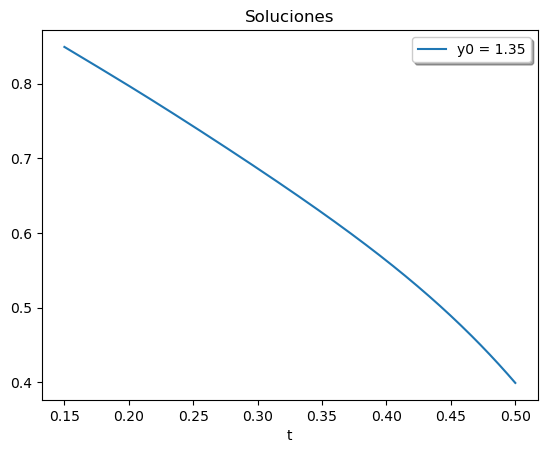

In [25]:
plt.plot(t_disc, z.T)
plt.xlabel('t')
plt.legend(['y0 = 1.35'], shadow=True)
plt.title('Soluciones')
plt.show()

Ecuación diferencial lineal

In [26]:
A = np.array([[0,1],[-1,0]])

In [28]:
def gg(t,y):
    return A @ y

In [30]:
tmin, tmax = 0.0, 2*np.pi
intervalo = [tmin, tmax]
val_iniciales = np.array([1, -1])

In [39]:
solucion = solve_ivp(gg, intervalo, val_iniciales, t_eval=np.linspace(tmin,tmax, 100))

In [36]:
print(solucion.y[0])

[ 1.          0.62111307  0.17495845 -0.29053982 -0.72452219 -1.07973025
 -1.31771206 -1.4134443  -1.35562794 -1.15020145 -0.82081461 -0.4023643
  0.06002229  0.51584798  0.91546069  1.21588941  1.3849695   1.40334475
  1.26933483  0.99816427]


In [40]:
xx, yy = solucion.y[0], solucion.y[1] 

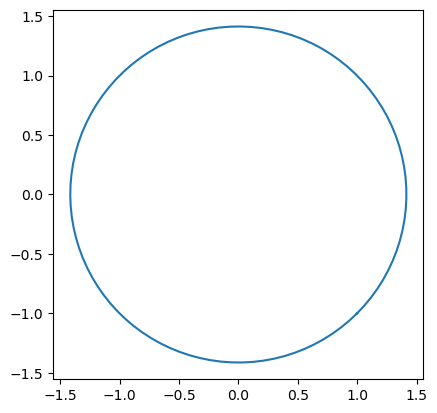

In [41]:
plt.plot(xx, yy)
plt.gca().set_aspect("equal")
plt.show()

In [34]:
np.shape(solucion.y)

(2, 20)